In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
# data_USED_CAR = pd.read_excel("data.xlsx", sheet_name="USED_CAR")
data_NEW_CAR = pd.read_excel("data.xlsx", sheet_name="NEW_CAR")
# print (data_USED_CAR.shape)
print (data_NEW_CAR.shape)

(7128, 12)


In [4]:
data_NEW_CAR.head()

,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,CUS_BIRTH_DATE,GENDER
0,0,368748,2001-07-18,G,SUBURBAN,Indigo Blue/lw. Gold,13240.87803,0.00000,2001,70,NaN,M
1,0,565856,2004-06-15,G,BLAZER,Silver Green Metalli,10537.45200,0.00000,2004,85,94/08/26 00:00:00,M
2,0,498561,2003-10-05,H,CAPRICE,BERRY RED,11391.84000,0.00000,2004,51,90/09/10 00:00:01,M
3,17,492653,2003-08-25,H,CAPRICE,Quick Silver,8793.07650,-0.01069,2004,55,73/12/12 00:00:00,M
4,17,504038,2003-08-20,H,CAPRICE,WHITE,8793.07650,-0.00335,2004,70,88/08/16 00:00:00,F


In [5]:
data_NEW_CAR.dtypes

CUSTOMERID            int64
VEHICLEID             int64
TRANSACTION_DATE     object
BRAND                object
MODEL                object
COLOUR               object
ACTUAL_PRICE        float64
DISCOUNTED RATIO    float64
MODELYR               int64
STORECODE             int64
CUS_BIRTH_DATE       object
GENDER               object
dtype: object

In [6]:
data_NEW_CAR['TRANSACTION_DATE'] = data_NEW_CAR['TRANSACTION_DATE'].str.replace("00", "01")
data_NEW_CAR['TRANSACTION_DATE'] = data_NEW_CAR['TRANSACTION_DATE'].str.replace("-02-29", "-02-28")

data_NEW_CAR['TRANSACTION_DATE_1'] = pd.to_datetime(data_NEW_CAR['TRANSACTION_DATE'], format='%Y-%m-%d')

data_NEW_CAR.head()



,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,CUS_BIRTH_DATE,GENDER,TRANSACTION_DATE_1
0,0,368748,2011-07-18,G,SUBURBAN,Indigo Blue/lw. Gold,13240.87803,0.00000,2001,70,NaN,M,2011-07-18
1,0,565856,2014-06-15,G,BLAZER,Silver Green Metalli,10537.45200,0.00000,2004,85,94/08/26 00:00:00,M,2014-06-15
2,0,498561,2013-10-05,H,CAPRICE,BERRY RED,11391.84000,0.00000,2004,51,90/09/10 00:00:01,M,2013-10-05
3,17,492653,2013-08-25,H,CAPRICE,Quick Silver,8793.07650,-0.01069,2004,55,73/12/12 00:00:00,M,2013-08-25
4,17,504038,2013-08-20,H,CAPRICE,WHITE,8793.07650,-0.00335,2004,70,88/08/16 00:00:00,F,2013-08-20


In [7]:
data_NEW_CAR.dtypes

CUSTOMERID                     int64
VEHICLEID                      int64
TRANSACTION_DATE              object
BRAND                         object
MODEL                         object
COLOUR                        object
ACTUAL_PRICE                 float64
DISCOUNTED RATIO             float64
MODELYR                        int64
STORECODE                      int64
CUS_BIRTH_DATE                object
GENDER                        object
TRANSACTION_DATE_1    datetime64[ns]
dtype: object

In [8]:
data_NEW_CAR_1 = data_NEW_CAR[data_NEW_CAR['CUS_BIRTH_DATE'].str.contains("/", na=False)]
data_NEW_CAR_1['CUS_BIRTH_DATE_1'] = pd.to_datetime(data_NEW_CAR_1['CUS_BIRTH_DATE'], format='%y/%m/%d %H:%M:%S')

data_NEW_CAR_2 = data_NEW_CAR[~data_NEW_CAR['CUS_BIRTH_DATE'].str.contains("/", na=False)]


data_NEW_CAR_2['CUS_BIRTH_DATE'] = np.where(data_NEW_CAR_2['CUS_BIRTH_DATE']=='en', np.NAN, data_NEW_CAR_2['CUS_BIRTH_DATE'])
print (data_NEW_CAR_2[data_NEW_CAR_2['CUS_BIRTH_DATE'] == 'en'].shape)

data_NEW_CAR_2['CUS_BIRTH_DATE_1'] = pd.to_datetime(data_NEW_CAR_2['CUS_BIRTH_DATE'], format='%Y-%m-%d %H:%M:%S')
data_NEW_CAR_2.shape

data_NEW_CAR_new = pd.concat([data_NEW_CAR_1,data_NEW_CAR_2], axis=0)

data_NEW_CAR_new.reset_index(inplace=True)

(0, 13)


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide

In [9]:
data_NEW_CAR_new.head()

,index,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,CUS_BIRTH_DATE,GENDER,TRANSACTION_DATE_1,CUS_BIRTH_DATE_1
0,1,0,565856,2014-06-15,G,BLAZER,Silver Green Metalli,10537.45200,0.00000,2004,85,94/08/26 00:00:00,M,2014-06-15,1994-08-26 00:00:00
1,2,0,498561,2013-10-05,H,CAPRICE,BERRY RED,11391.84000,0.00000,2004,51,90/09/10 00:00:01,M,2013-10-05,1990-09-10 00:00:01
2,3,17,492653,2013-08-25,H,CAPRICE,Quick Silver,8793.07650,-0.01069,2004,55,73/12/12 00:00:00,M,2013-08-25,1973-12-12 00:00:00
3,4,17,504038,2013-08-20,H,CAPRICE,WHITE,8793.07650,-0.00335,2004,70,88/08/16 00:00:00,F,2013-08-20,1988-08-16 00:00:00
4,5,17,503816,2013-08-20,H,CAPRICE,WHITE,8793.07650,-0.00335,2004,2,87/10/11 00:00:00,M,2013-08-20,1987-10-11 00:00:00


In [10]:
data_NEW_CAR_new.shape

(7128, 15)

In [11]:
data_NEW_CAR_new.head()

,index,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,CUS_BIRTH_DATE,GENDER,TRANSACTION_DATE_1,CUS_BIRTH_DATE_1
0,1,0,565856,2014-06-15,G,BLAZER,Silver Green Metalli,10537.45200,0.00000,2004,85,94/08/26 00:00:00,M,2014-06-15,1994-08-26 00:00:00
1,2,0,498561,2013-10-05,H,CAPRICE,BERRY RED,11391.84000,0.00000,2004,51,90/09/10 00:00:01,M,2013-10-05,1990-09-10 00:00:01
2,3,17,492653,2013-08-25,H,CAPRICE,Quick Silver,8793.07650,-0.01069,2004,55,73/12/12 00:00:00,M,2013-08-25,1973-12-12 00:00:00
3,4,17,504038,2013-08-20,H,CAPRICE,WHITE,8793.07650,-0.00335,2004,70,88/08/16 00:00:00,F,2013-08-20,1988-08-16 00:00:00
4,5,17,503816,2013-08-20,H,CAPRICE,WHITE,8793.07650,-0.00335,2004,2,87/10/11 00:00:00,M,2013-08-20,1987-10-11 00:00:00


In [12]:
###########################################################################################################

In [13]:
###########################################################

In [14]:
data_NEW_CAR_new["CUSTOMERID"].value_counts()

4591       712
578497     279
613        140
17         113
1229949     93
2509989     73
644052      70
2971736     67
3139479     64
189453      64
2993960     56
796         56
673550      53
25          48
837168      42
1276567     41
718521      41
729217      39
1443155     39
691979      34
2333942     29
3275139     27
1241470     25
78          22
3419582     21
1442757     21
1446383     20
387687      19
577514      19
387096      18
1188662     15
409882      14
1230502     14
3557963     13
387547      12
1673075     12
3615172     11
1026389     10
2962        10
2680278     10
3662432     10
386633       9
2562582      9
273244       9
618493       9
1345964      9
1150391      9
218277       8
2877268      8
1295674      8
901469       8
1242675      8
2560         7
583687       7
1254727      7
1212324      7
3368836      7
3034197      7
528895       6
3648336      6
529003       6
1209150      6
1315164      6
1150040      6
2429720      6
555222       6
1381918   

In [15]:
data_NEW_CAR_new["BRAND"].value_counts()

G    2558
H    2503
C     903
D     798
K     176
O      95
T      44
A      15
M      13
B       9
S       9
E       5
Name: BRAND, dtype: int64

In [16]:
data_NEW_CAR_new["COLOUR"].value_counts()

WHITE                              787
Black                              494
Summit White                       444
Quick Silver                       247
Bright White                       223
Olympic White                      213
PHANTOM BLACK                      179
Silver Ice Metallic                176
Champagne Silver Metallic          144
Tungsten Silver                    139
Light Pewter                       130
MARTINI GRAY                       120
Botanica Dark Blue                 107
TURBINE GREY                        99
Galaxy White                        89
Sandstone Metallic                  82
Mocha Steel Metallic                77
Orion Dark Gray                     73
Capricorn Dark Green                64
Brownstone Metallic                 63
Indigo Blue                         61
Tungsten Metallic                   61
Phantom Black Metallic              56
White Diamond                       54
Amazon Dark Blue                    50
Grey Storm               

In [17]:
data_NEW_CAR_new["ACTUAL_PRICE"].plot.hist(bins=10, alpha=0.5)
# import matplotlib.pyplot as plt
# plt.hist(data_USED_CAR_new_1["ACTUAL_PRICE"].astype('float'))
# plt.show()

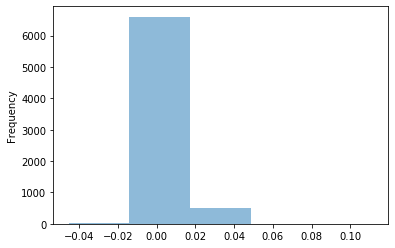

In [18]:
data_NEW_CAR_new["DISCOUNTED RATIO"].plot.hist(bins=5, alpha=0.5)


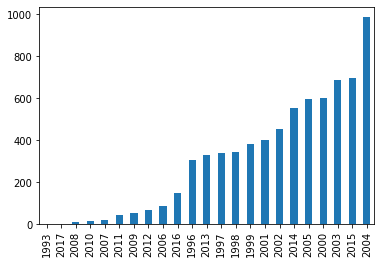

In [19]:
data_NEW_CAR_new["MODELYR"].value_counts().sort_values().plot(kind = 'bar')



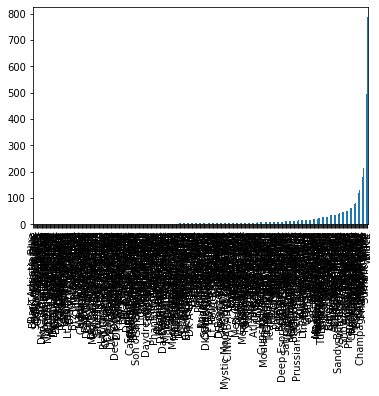

In [20]:
data_NEW_CAR_new["COLOUR"].value_counts().sort_values().plot(kind = 'bar')


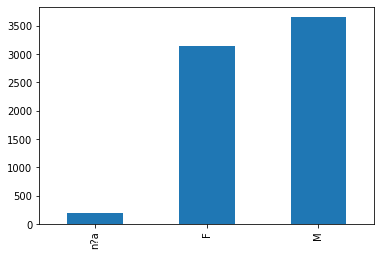

In [21]:
data_NEW_CAR_new["GENDER"].value_counts().sort_values().plot(kind = 'bar')


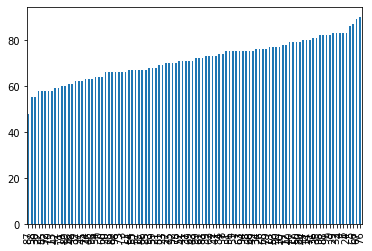

In [22]:
data_NEW_CAR_new["STORECODE"].value_counts().sort_values().plot(kind = 'bar')


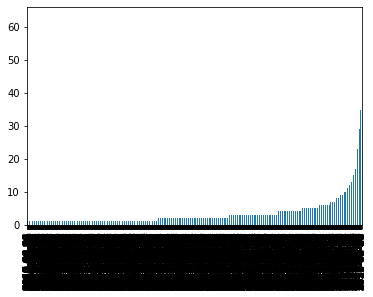

In [23]:

data_NEW_CAR_new["TRANSACTION_DATE"].value_counts().sort_values().plot(kind = 'bar')


In [24]:
data_NEW_CAR_new["CUS_BIRTH_DATE"].value_counts()


2020-01-09 00:00:00    11
2027-01-09 00:00:00    10
2022-01-09 00:00:00     9
2023-01-09 00:00:00     8
2001-01-10 00:00:00     8
1930-01-09 00:00:00     8
2025-01-09 00:00:00     7
2022-01-10 00:00:00     7
2026-01-09 00:00:00     7
88/03/08 00:00:00       6
2001-01-09 00:00:00     6
91/01/01 00:00:00       6
92/05/03 00:00:00       6
1930-01-10 00:00:00     5
2020-01-10 00:00:00     5
2028-01-09 00:00:00     5
95/02/09 00:00:00       5
2026-01-10 00:00:00     5
90/11/28 00:00:00       5
90/10/10 00:00:00       5
2025-01-10 00:00:00     5
90/09/26 00:00:00       5
20/05/25 00:00:00       5
91/07/22 00:00:00       5
93/09/01 00:00:00       5
89/03/06 00:00:00       5
93/01/05 00:00:00       4
95/11/19 00:00:00       4
2005-01-02 00:00:00     4
87/10/12 00:00:00       4
80/09/26 00:00:00       4
76/09/24 00:00:00       4
2023-01-10 00:00:00     4
89/04/26 00:00:00       4
86/09/21 00:00:00       4
93/04/07 00:00:00       4
00/03/10 00:00:00       4
92/11/29 00:00:00       4
78/12/01 00:

In [25]:
print ("min TRANSACTION_DATE", data_NEW_CAR_new["TRANSACTION_DATE_1"].min() , "    max TRANSACTION_DATE" , data_NEW_CAR_new["TRANSACTION_DATE_1"].max())
print ("min CUS_BIRTH_DATE", data_NEW_CAR_new["CUS_BIRTH_DATE_1"].min() , "    max CUS_BIRTH_DATE" , data_NEW_CAR_new["CUS_BIRTH_DATE_1"].max())

min TRANSACTION_DATE 1897-03-11 00:00:00     max TRANSACTION_DATE 2019-12-29 00:00:00
min CUS_BIRTH_DATE 1930-01-08 00:00:00     max CUS_BIRTH_DATE 2085-01-04 00:00:00


In [26]:
pd.DatetimeIndex(data_NEW_CAR_new['TRANSACTION_DATE_1']).day

Float64Index([15.0,  5.0, 25.0, 20.0, 20.0, 25.0, 20.0, 20.0, 28.0, 10.0,
              ...
              30.0,  8.0, 17.0, 17.0, 28.0, 28.0, 19.0, 20.0, 30.0, 30.0],
             dtype='float64', name='TRANSACTION_DATE_1', length=7128)

In [27]:
###################################################################################

In [28]:
data_NEW_CAR_new.shape

(7128, 15)

In [29]:
data_NEW_CAR_new[data_NEW_CAR_new["CUSTOMERID"] == 0].shape

(3, 15)

In [30]:
data_Anomalies_filters_new_cars = data_NEW_CAR_new[data_NEW_CAR_new["CUSTOMERID"] != 0]
data_Anomalies_filters_new_cars.shape

(7125, 15)

In [31]:
data_Anomalies_filters_new_cars[data_Anomalies_filters_new_cars["TRANSACTION_DATE"].isnull()]

,index,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,CUS_BIRTH_DATE,GENDER,TRANSACTION_DATE_1,CUS_BIRTH_DATE_1
2496,3054,673550,1821791,NaN,G,TAHOE,Slate Gray Metallic,23203.75410,0.00000,2016,88,79/06/21 00:00:01,M,NaT,1979-06-21 00:00:01
2891,3535,762868,326727,NaN,H,LUMINA,Orion Dark Gray,8224.62368,0.00000,2000,59,87/01/14 00:00:00,F,NaT,1987-01-14 00:00:00
4704,5714,1846689,1599445,NaN,T,Trail Blazer,Olympic White,12258.33183,0.00000,2014,15,77/08/21 00:00:01,F,NaT,1977-08-21 00:00:01
5711,6907,3505765,1750726,NaN,G,TRAVERSE,Blue Velvet Metallic,11916.57663,0.00000,2015,6,73/03/10 00:00:01,F,NaT,1973-03-10 00:00:01


In [32]:
data_Anomalies_filters_new_cars = data_Anomalies_filters_new_cars[~data_Anomalies_filters_new_cars["TRANSACTION_DATE"].isnull()]
data_Anomalies_filters_new_cars.shape

(7121, 15)

In [33]:
data_Anomalies_filters_new_cars = data_Anomalies_filters_new_cars[data_Anomalies_filters_new_cars['ACTUAL_PRICE'] < 100000]
data_Anomalies_filters_new_cars = data_Anomalies_filters_new_cars[data_Anomalies_filters_new_cars['ACTUAL_PRICE'] > 1]
data_Anomalies_filters_new_cars = data_Anomalies_filters_new_cars[data_Anomalies_filters_new_cars['DISCOUNTED RATIO'] < 1]
data_Anomalies_filters_new_cars.shape

(7106, 15)

In [34]:
print (data_Anomalies_filters_new_cars.shape)
data_Anomalies_filters_new_cars.head()

(7106, 15)


,index,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,CUS_BIRTH_DATE,GENDER,TRANSACTION_DATE_1,CUS_BIRTH_DATE_1
2,3,17,492653,2013-08-25,H,CAPRICE,Quick Silver,8793.07650,-0.01069,2004,55,73/12/12 00:00:00,M,2013-08-25,1973-12-12
3,4,17,504038,2013-08-20,H,CAPRICE,WHITE,8793.07650,-0.00335,2004,70,88/08/16 00:00:00,F,2013-08-20,1988-08-16
4,5,17,503816,2013-08-20,H,CAPRICE,WHITE,8793.07650,-0.00335,2004,2,87/10/11 00:00:00,M,2013-08-20,1987-10-11
5,6,17,504049,2013-08-25,H,CAPRICE,WHITE,8793.07650,-0.00335,2004,59,93/01/05 00:00:00,M,2013-08-25,1993-01-05
6,8,17,500376,2013-08-20,H,CAPRICE,WHITE,8793.07650,-0.00889,2004,36,81/06/28 00:00:00,M,2013-08-20,1981-06-28


In [35]:
data_Anomalies_filters_new_cars['profit_gain'] = data_Anomalies_filters_new_cars['ACTUAL_PRICE'] * data_Anomalies_filters_new_cars['DISCOUNTED RATIO']

data_Anomalies_filters_new_cars['selling_price'] = data_Anomalies_filters_new_cars['ACTUAL_PRICE'] + data_Anomalies_filters_new_cars['profit_gain']

data_Anomalies_filters_new_cars['profit_gain_indicator'] = np.where(data_Anomalies_filters_new_cars['profit_gain'] > 0 , 'Positive', 
                                                    np.where(data_Anomalies_filters_new_cars['profit_gain'] < 0, "Negative", "Neutral"))

data_Anomalies_filters_new_cars['profit_gain_indicator'].value_counts()

Neutral     5958
Negative     593
Positive     555
Name: profit_gain_indicator, dtype: int64

In [36]:
data_Anomalies_filters_new_cars["GENDER"] = np.where(data_Anomalies_filters_new_cars["GENDER"] =="n?a", "Not_Available", data_Anomalies_filters_new_cars["GENDER"])


In [37]:
data_Anomalies_filters_new_cars['TRANSACTION_year'] = pd.DatetimeIndex(data_Anomalies_filters_new_cars['TRANSACTION_DATE_1']).year
data_Anomalies_filters_new_cars['TRANSACTION_month'] = pd.DatetimeIndex(data_Anomalies_filters_new_cars['TRANSACTION_DATE_1']).month
data_Anomalies_filters_new_cars['TRANSACTION_day'] = pd.DatetimeIndex(data_Anomalies_filters_new_cars['TRANSACTION_DATE_1']).day


data_Anomalies_filters_new_cars['TRANSACTION_year'] = data_Anomalies_filters_new_cars['TRANSACTION_year'].fillna(-1)
data_Anomalies_filters_new_cars['TRANSACTION_year'] = data_Anomalies_filters_new_cars['TRANSACTION_year'].astype(int)
data_Anomalies_filters_new_cars['TRANSACTION_year'] = data_Anomalies_filters_new_cars['TRANSACTION_year'].astype(str)
data_Anomalies_filters_new_cars['TRANSACTION_year'] = data_Anomalies_filters_new_cars['TRANSACTION_year'].replace('-1', np.nan)

data_Anomalies_filters_new_cars['TRANSACTION_month'] = data_Anomalies_filters_new_cars['TRANSACTION_month'].fillna(-1)
data_Anomalies_filters_new_cars['TRANSACTION_month'] = data_Anomalies_filters_new_cars['TRANSACTION_month'].astype(int)
data_Anomalies_filters_new_cars['TRANSACTION_month'] = data_Anomalies_filters_new_cars['TRANSACTION_month'].astype(str)
data_Anomalies_filters_new_cars['TRANSACTION_month'] = data_Anomalies_filters_new_cars['TRANSACTION_month'].replace('-1', np.nan)

data_Anomalies_filters_new_cars['TRANSACTION_day'] = data_Anomalies_filters_new_cars['TRANSACTION_day'].fillna(-1)
data_Anomalies_filters_new_cars['TRANSACTION_day'] = data_Anomalies_filters_new_cars['TRANSACTION_day'].astype(int)
data_Anomalies_filters_new_cars['TRANSACTION_day'] = data_Anomalies_filters_new_cars['TRANSACTION_day'].astype(str)
data_Anomalies_filters_new_cars['TRANSACTION_day'] = data_Anomalies_filters_new_cars['TRANSACTION_day'].replace('-1', np.nan)

In [38]:
data_Anomalies_filters_new_cars.head()

,index,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,CUS_BIRTH_DATE,GENDER,TRANSACTION_DATE_1,CUS_BIRTH_DATE_1,profit_gain,selling_price,profit_gain_indicator,TRANSACTION_year,TRANSACTION_month,TRANSACTION_day
2,3,17,492653,2013-08-25,H,CAPRICE,Quick Silver,8793.07650,-0.01069,2004,55,73/12/12 00:00:00,M,2013-08-25,1973-12-12,-94.02540,8699.05110,Negative,2013,8,25
3,4,17,504038,2013-08-20,H,CAPRICE,WHITE,8793.07650,-0.00335,2004,70,88/08/16 00:00:00,F,2013-08-20,1988-08-16,-29.44791,8763.62859,Negative,2013,8,20
4,5,17,503816,2013-08-20,H,CAPRICE,WHITE,8793.07650,-0.00335,2004,2,87/10/11 00:00:00,M,2013-08-20,1987-10-11,-29.44791,8763.62859,Negative,2013,8,20
5,6,17,504049,2013-08-25,H,CAPRICE,WHITE,8793.07650,-0.00335,2004,59,93/01/05 00:00:00,M,2013-08-25,1993-01-05,-29.44791,8763.62859,Negative,2013,8,25
6,8,17,500376,2013-08-20,H,CAPRICE,WHITE,8793.07650,-0.00889,2004,36,81/06/28 00:00:00,M,2013-08-20,1981-06-28,-78.14802,8714.92848,Negative,2013,8,20


In [39]:
# dummies_data = pd.get_dummies(data_Anomalies_filters_new_cars, columns=['COLOUR', 'GENDER', 'MODEL', 'profit_gain_indicator'])

dummies_data_1 = pd.get_dummies(data_Anomalies_filters_new_cars[['CUSTOMERID','COLOUR','BRAND', 'GENDER', 'MODEL', 'profit_gain_indicator', 'MODELYR', 'TRANSACTION_year', 'TRANSACTION_month', 'TRANSACTION_day']], \
                                columns=['COLOUR', 'BRAND', 'GENDER', 'MODEL', 'profit_gain_indicator', 'MODELYR', 'TRANSACTION_year', 'TRANSACTION_month', 'TRANSACTION_day']).groupby('CUSTOMERID', as_index=False).max()

In [40]:
dummies_data_1.head()

,CUSTOMERID,COLOUR_Abalone White,COLOUR_Active Red Metallic,COLOUR_Alchemy Metallic,COLOUR_Alpine White,COLOUR_Alto Grey Metallic,COLOUR_Amazon Dark Blue,COLOUR_Amber Bronze,COLOUR_Antelope,COLOUR_Arctic White,COLOUR_Artic White,COLOUR_Ashen Grey Metallic,COLOUR_Atlantis Blue Metallic,COLOUR_Auburn Brown,COLOUR_Aut Wood / Brz Mist,COLOUR_Azurite Blue,COLOUR_BAROLO RED,COLOUR_BERRY RED,COLOUR_BLACK,COLOUR_BLACK II,COLOUR_BLACK SAPPHIRE,COLOUR_BLUE METALLIC,COLOUR_BRIGHTON GOLD,COLOUR_Bamboo Green,COLOUR_Barbados Blue,COLOUR_Bermuda Dark Blue,COLOUR_Berry Red,COLOUR_Black,COLOUR_Black / Cayene Red M,COLOUR_Black / Polo Green,COLOUR_Black / Quicksilver,COLOUR_Black Granite,COLOUR_Black Ice Metallic,COLOUR_Black Onyx/Gray,COLOUR_Black Raven,COLOUR_Black Saphire Metallic,COLOUR_Black Sapphire,COLOUR_Black/Beige,COLOUR_Black/Pewter,COLOUR_Blue Granite,COLOUR_Blue Granite Metallic,COLOUR_Blue Ice,COLOUR_Blue Ray Metallic,COLOUR_Blue Topaz Metallic,COLOUR_Blue Velvet Metallic,COLOUR_Blue/Sandalwood,COLOUR_Boracay Blue,COLOUR_Botanica Dark Blue,COLOUR_Brgt. Aqua/Polo Grn.,COLOUR_Bright Aqua Metallic,COLOUR_Bright Aqua/Pewter,COLOUR_Bright Green Met.,COLOUR_Bright Red,COLOUR_Bright Silver Met.,COLOUR_Bright White,COLOUR_Bright Yellow,COLOUR_Brit Aqua/Q.silver,COLOUR_Brite Aqua/Lt Autumn,COLOUR_Bronzemist,COLOUR_Brownstone Metallic,COLOUR_Brz Mist / Aut Wood,COLOUR_Burnt Red Metallic,COLOUR_CHILI RED,COLOUR_CINNABAR DARK ORANGE,COLOUR_COBALT BLUE,COLOUR_Canterbury Green,COLOUR_Capricorn Dark Green,COLOUR_Carbon Flash Black,COLOUR_Caribbean Blue,COLOUR_Carm.Red/Automn Wood,COLOUR_Carmine Red,COLOUR_Carmine Red/Pewter,COLOUR_Casablanka White,COLOUR_Cashmere,COLOUR_Cashmere Beige,COLOUR_Cayene Red Metallic,COLOUR_Champagne,COLOUR_Champagne Silver Metallic,COLOUR_Charcoal Grey,COLOUR_Cherry Ice,COLOUR_Cherry Ice/Cay Red M,COLOUR_Cherry Ice/Dk Cherry,COLOUR_Cherry Ice/Lt. Autum,COLOUR_Cherry Ice/Silver,COLOUR_Classic Green,COLOUR_Concord Metallic,COLOUR_Copper/lower Gold,COLOUR_Cosmo Purple,COLOUR_Cotillion White,COLOUR_Cove Green,COLOUR_Crystal Red,COLOUR_Crystal Red Tintcoat,COLOUR_Crystal White,COLOUR_Cyber Gray,COLOUR_D.Bronzemist/Pewter,COLOUR_DARK SAPPHIRE,COLOUR_Dallia Blue,COLOUR_Dark Adriatic Blue,COLOUR_Dark Blue,COLOUR_Dark Burgundy,COLOUR_Dark Cherry,COLOUR_Dark Cherry Red,COLOUR_Dark Cherry/Beige,COLOUR_Dark Chestnut,COLOUR_Dark Copper,COLOUR_Dark Copper/Bronze,COLOUR_Dark Denim Grey,COLOUR_Dark Granite Metallic,COLOUR_Dark Gray,COLOUR_Dark Green Grey,COLOUR_Dark Grey,COLOUR_Dark Tropic Teal Met,COLOUR_Dark Wine Purple,COLOUR_DarkCarmiRed/LtAuWoo,COLOUR_Daydream Beige Metallic,COLOUR_Deep Blue Green,COLOUR_Deep Espresso Brown Metallic,COLOUR_Deep Ocean Blue Metallic,COLOUR_Deep Ruby Metallic,COLOUR_Delft Blue,COLOUR_Denim Blue,COLOUR_Diamond White,COLOUR_Dk A Blue/Cay Red Me,COLOUR_Dk A-Blue/Lt A-Wood,COLOUR_Dk Carmine Red/Gold,COLOUR_Dk Cherry/Cay Red Me,COLOUR_Dk Cherry/Cherry Ice,COLOUR_Dk. Bronze / Silver,COLOUR_Dk. Purple/Automnw.,COLOUR_Dk.Copper/Dk.Argent,COLOUR_Dk.Copper/Lt.Autumnw,COLOUR_Dk.Copper/Pewter,COLOUR_Dk.Green/Lt.Autumnwd,COLOUR_Dk.Otter Met.,COLOUR_Dk.Purple/Silvermist,COLOUR_Dk.Teal Met.,COLOUR_Dove Silver,COLOUR_Dove Silver Metallic,COLOUR_EXPRESSO BLACK,COLOUR_EmeralD Green,COLOUR_Emerald Green,COLOUR_Evoke,COLOUR_Fairway Green,COLOUR_Fire Red,COLOUR_Fire Red / Lt.Pewter,COLOUR_Fire Red/Gold,COLOUR_Forest Green Metallc,COLOUR_Forest Green/Pewter,COLOUR_Frost Beige,COLOUR_Frost Green Metallic,COLOUR_Frost White,COLOUR_GALAXY WHITE,COLOUR_GOLDEN YELLOW,COLOUR_Galaxy White,COLOUR_Garnet Red,COLOUR_Genesis Blue,COLOUR_Genteel Green,COLOUR_Gilt Green,COLOUR_Glacier Lake Blue,COLOUR_Gold Firemist,COLOUR_Gold Mist (M),COLOUR_Gold/Lower Pewter,COLOUR_Goldish Beige Mica,COLOUR_Granada Black,COLOUR_Granada Dark Red,COLOUR_Graphite,COLOUR_Gray/lw Light Pewter,COLOUR_Graystone Metallic,COLOUR_Green Metallic,COLOUR_Green Pearl/Gold,COLOUR_Green Pearl/Gray,COLOUR_Green/lower Gold,COLOUR_Grey Storm,COLOUR_Greystone (M),CO

In [41]:
import datetime

now = datetime.datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

rfm= data_Anomalies_filters_new_cars.groupby('CUSTOMERID').agg({'TRANSACTION_DATE_1': lambda date: (datetime.datetime.now() - date.max()).days,
                                            'CUSTOMERID': lambda num: len(num),
                                            'selling_price': lambda price: price.sum()})

rfm.columns = ["Recency", "Frequency", "Sum_Sales"]

rfm.reset_index(inplace = True)
rfm.shape

Current date and time : 
2020-02-24 02:47:23


(4243, 4)

In [42]:
rfm.shape

(4243, 4)

In [43]:
dummies_data_1.shape

(4243, 582)

In [44]:
final_data = pd.merge(rfm, dummies_data_1, on = "CUSTOMERID", how = "inner")

In [45]:
final_data.shape

(4243, 585)

In [46]:
from datetime import datetime, timedelta, date

d0 = date(2019, 12, 29)
delta = d0 - timedelta(days=90)
print(delta)


2019-09-30


In [47]:
data_Anomalies_filters_new_cars.dtypes

index                             int64
CUSTOMERID                        int64
VEHICLEID                         int64
TRANSACTION_DATE                 object
BRAND                            object
MODEL                            object
COLOUR                           object
ACTUAL_PRICE                    float64
DISCOUNTED RATIO                float64
MODELYR                           int64
STORECODE                         int64
CUS_BIRTH_DATE                   object
GENDER                           object
TRANSACTION_DATE_1       datetime64[ns]
CUS_BIRTH_DATE_1         datetime64[ns]
profit_gain                     float64
selling_price                   float64
profit_gain_indicator            object
TRANSACTION_year                 object
TRANSACTION_month                object
TRANSACTION_day                  object
dtype: object

In [48]:
# # min TRANSACTION_DATE 1897-03-11 00:00:00     max TRANSACTION_DATE 2019-12-29 00:00:00

# data_Anomalies_filters_new_cars[data_Anomalies_filters_new_cars['TRANSACTION_DATE_1'] >= "2019-09-30" & \
#                                 data_Anomalies_filters_new_cars['TRANSACTION_DATE_1'] <= '2019-12-29'] ['CUSTOMERID']

In [49]:
# min TRANSACTION_DATE 1897-03-11 00:00:00     max TRANSACTION_DATE 2019-12-29 00:00:00

cust_id = data_Anomalies_filters_new_cars[(data_Anomalies_filters_new_cars['TRANSACTION_DATE_1'] >= "30-09-2019") & \
                                (data_Anomalies_filters_new_cars['TRANSACTION_DATE_1'] <= '29-12-2019')] 

In [50]:
cust_id['purchased'] = 1

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
cust_id.shape

(57, 22)

In [52]:
test_model_data = pd.merge(final_data, cust_id[['CUSTOMERID', 'purchased']], on = "CUSTOMERID", how = "left")

test_model_data.fillna({'purchased': 0}, inplace = True)
test_model_data['purchased'] = test_model_data['purchased'].astype(int)

In [53]:
test_model_data['purchased'].value_counts()

0    4188
1      57
Name: purchased, dtype: int64

In [54]:
from datetime import datetime, timedelta

d0 = date(2019, 9, 30)
delta = d0 - timedelta(days=90)
print(delta)


2019-07-02


In [55]:
# min TRANSACTION_DATE 1897-03-11 00:00:00     max TRANSACTION_DATE 2019-12-29 00:00:00

test_cust_id = data_Anomalies_filters_new_cars[(data_Anomalies_filters_new_cars['TRANSACTION_DATE_1'] >= "30-09-2014") & \
                                (data_Anomalies_filters_new_cars['TRANSACTION_DATE_1'] <= '29-12-2014')] 
test_cust_id.shape

(262, 21)

In [56]:
test_cust_id["purchased"] = 1

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
test_cust_id.head()

,index,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,CUS_BIRTH_DATE,GENDER,TRANSACTION_DATE_1,CUS_BIRTH_DATE_1,profit_gain,selling_price,profit_gain_indicator,TRANSACTION_year,TRANSACTION_month,TRANSACTION_day,purchased
147,186,286,1606507,2014-09-30,G,SUBURBAN,Summit White,18737.44083,0.00000,2015,9,78/07/09 00:00:01,M,2014-09-30,1978-07-09 00:00:01,0.00000,18737.44083,Neutral,2014,9,30,1
897,1100,4591,603078,2014-10-27,D,EPICA,Galaxy White,5785.51825,0.00000,2005,33,00/04/16 00:00:00,M,2014-10-27,2000-04-16 00:00:00,0.00000,5785.51825,Neutral,2014,10,27,1
898,1101,4591,598211,2014-10-18,D,AVEO,Active Red Metallic,4006.95014,0.00000,2005,11,91/07/14 00:00:00,F,2014-10-18,1991-07-14 00:00:00,0.00000,4006.95014,Neutral,2014,10,18,1
909,1115,4591,609029,2014-11-16,H,LUMINA,WHITE,7710.42308,0.00000,2005,10,73/03/25 00:00:01,F,2014-11-16,1973-03-25 00:00:01,0.00000,7710.42308,Neutral,2014,11,16,1
910,1116,4591,609341,2014-12-07,D,OPTRA,Denim Blue,4579.57664,0.00000,2005,37,84/08/09 00:00:01,M,2014-12-07,1984-08-09 00:00:01,0.00000,4579.57664,Neutral,2014,12,7,1


In [58]:
model_data = final_data.copy()

In [59]:
model_data = pd.merge(model_data, test_cust_id[['CUSTOMERID', 'purchased']], on = "CUSTOMERID", how = "left")

In [60]:
model_data.head()

,CUSTOMERID,Recency,Frequency,Sum_Sales,COLOUR_Abalone White,COLOUR_Active Red Metallic,COLOUR_Alchemy Metallic,COLOUR_Alpine White,COLOUR_Alto Grey Metallic,COLOUR_Amazon Dark Blue,COLOUR_Amber Bronze,COLOUR_Antelope,COLOUR_Arctic White,COLOUR_Artic White,COLOUR_Ashen Grey Metallic,COLOUR_Atlantis Blue Metallic,COLOUR_Auburn Brown,COLOUR_Aut Wood / Brz Mist,COLOUR_Azurite Blue,COLOUR_BAROLO RED,COLOUR_BERRY RED,COLOUR_BLACK,COLOUR_BLACK II,COLOUR_BLACK SAPPHIRE,COLOUR_BLUE METALLIC,COLOUR_BRIGHTON GOLD,COLOUR_Bamboo Green,COLOUR_Barbados Blue,COLOUR_Bermuda Dark Blue,COLOUR_Berry Red,COLOUR_Black,COLOUR_Black / Cayene Red M,COLOUR_Black / Polo Green,COLOUR_Black / Quicksilver,COLOUR_Black Granite,COLOUR_Black Ice Metallic,COLOUR_Black Onyx/Gray,COLOUR_Black Raven,COLOUR_Black Saphire Metallic,COLOUR_Black Sapphire,COLOUR_Black/Beige,COLOUR_Black/Pewter,COLOUR_Blue Granite,COLOUR_Blue Granite Metallic,COLOUR_Blue Ice,COLOUR_Blue Ray Metallic,COLOUR_Blue Topaz Metallic,COLOUR_Blue Velvet Metallic,COLOUR_Blue/Sandalwood,COLOUR_Boracay Blue,COLOUR_Botanica Dark Blue,COLOUR_Brgt. Aqua/Polo Grn.,COLOUR_Bright Aqua Metallic,COLOUR_Bright Aqua/Pewter,COLOUR_Bright Green Met.,COLOUR_Bright Red,COLOUR_Bright Silver Met.,COLOUR_Bright White,COLOUR_Bright Yellow,COLOUR_Brit Aqua/Q.silver,COLOUR_Brite Aqua/Lt Autumn,COLOUR_Bronzemist,COLOUR_Brownstone Metallic,COLOUR_Brz Mist / Aut Wood,COLOUR_Burnt Red Metallic,COLOUR_CHILI RED,COLOUR_CINNABAR DARK ORANGE,COLOUR_COBALT BLUE,COLOUR_Canterbury Green,COLOUR_Capricorn Dark Green,COLOUR_Carbon Flash Black,COLOUR_Caribbean Blue,COLOUR_Carm.Red/Automn Wood,COLOUR_Carmine Red,COLOUR_Carmine Red/Pewter,COLOUR_Casablanka White,COLOUR_Cashmere,COLOUR_Cashmere Beige,COLOUR_Cayene Red Metallic,COLOUR_Champagne,COLOUR_Champagne Silver Metallic,COLOUR_Charcoal Grey,COLOUR_Cherry Ice,COLOUR_Cherry Ice/Cay Red M,COLOUR_Cherry Ice/Dk Cherry,COLOUR_Cherry Ice/Lt. Autum,COLOUR_Cherry Ice/Silver,COLOUR_Classic Green,COLOUR_Concord Metallic,COLOUR_Copper/lower Gold,COLOUR_Cosmo Purple,COLOUR_Cotillion White,COLOUR_Cove Green,COLOUR_Crystal Red,COLOUR_Crystal Red Tintcoat,COLOUR_Crystal White,COLOUR_Cyber Gray,COLOUR_D.Bronzemist/Pewter,COLOUR_DARK SAPPHIRE,COLOUR_Dallia Blue,COLOUR_Dark Adriatic Blue,COLOUR_Dark Blue,COLOUR_Dark Burgundy,COLOUR_Dark Cherry,COLOUR_Dark Cherry Red,COLOUR_Dark Cherry/Beige,COLOUR_Dark Chestnut,COLOUR_Dark Copper,COLOUR_Dark Copper/Bronze,COLOUR_Dark Denim Grey,COLOUR_Dark Granite Metallic,COLOUR_Dark Gray,COLOUR_Dark Green Grey,COLOUR_Dark Grey,COLOUR_Dark Tropic Teal Met,COLOUR_Dark Wine Purple,COLOUR_DarkCarmiRed/LtAuWoo,COLOUR_Daydream Beige Metallic,COLOUR_Deep Blue Green,COLOUR_Deep Espresso Brown Metallic,COLOUR_Deep Ocean Blue Metallic,COLOUR_Deep Ruby Metallic,COLOUR_Delft Blue,COLOUR_Denim Blue,COLOUR_Diamond White,COLOUR_Dk A Blue/Cay Red Me,COLOUR_Dk A-Blue/Lt A-Wood,COLOUR_Dk Carmine Red/Gold,COLOUR_Dk Cherry/Cay Red Me,COLOUR_Dk Cherry/Cherry Ice,COLOUR_Dk. Bronze / Silver,COLOUR_Dk. Purple/Automnw.,COLOUR_Dk.Copper/Dk.Argent,COLOUR_Dk.Copper/Lt.Autumnw,COLOUR_Dk.Copper/Pewter,COLOUR_Dk.Green/Lt.Autumnwd,COLOUR_Dk.Otter Met.,COLOUR_Dk.Purple/Silvermist,COLOUR_Dk.Teal Met.,COLOUR_Dove Silver,COLOUR_Dove Silver Metallic,COLOUR_EXPRESSO BLACK,COLOUR_EmeralD Green,COLOUR_Emerald Green,COLOUR_Evoke,COLOUR_Fairway Green,COLOUR_Fire Red,COLOUR_Fire Red / Lt.Pewter,COLOUR_Fire Red/Gold,COLOUR_Forest Green Metallc,COLOUR_Forest Green/Pewter,COLOUR_Frost Beige,COLOUR_Frost Green Metallic,COLOUR_Frost White,COLOUR_GALAXY WHITE,COLOUR_GOLDEN YELLOW,COLOUR_Galaxy White,COLOUR_Garnet Red,COLOUR_Genesis Blue,COLOUR_Genteel Green,COLOUR_Gilt Green,COLOUR_Glacier Lake Blue,COLOUR_Gold Firemist,COLOUR_Gold Mist (M),COLOUR_Gold/Lower Pewter,COLOUR_Goldish Beige Mica,COLOUR_Granada Black,COLOUR_Granada Dark Red,COLOUR_Graphite,COLOUR_Gray/lw Light Pewter,COLOUR_Graystone Metallic,COLOUR_Green Metallic,COLOUR_Green Pearl/Gold,COLOUR_Green Pearl/Gray,COLOUR_Green/lower Gold,COLOUR_Grey S

In [61]:
model_data.fillna({'purchased': 0}, inplace = True)
model_data['purchased'] = model_data['purchased'].astype(int)

In [62]:
model_data.head()

,CUSTOMERID,Recency,Frequency,Sum_Sales,COLOUR_Abalone White,COLOUR_Active Red Metallic,COLOUR_Alchemy Metallic,COLOUR_Alpine White,COLOUR_Alto Grey Metallic,COLOUR_Amazon Dark Blue,COLOUR_Amber Bronze,COLOUR_Antelope,COLOUR_Arctic White,COLOUR_Artic White,COLOUR_Ashen Grey Metallic,COLOUR_Atlantis Blue Metallic,COLOUR_Auburn Brown,COLOUR_Aut Wood / Brz Mist,COLOUR_Azurite Blue,COLOUR_BAROLO RED,COLOUR_BERRY RED,COLOUR_BLACK,COLOUR_BLACK II,COLOUR_BLACK SAPPHIRE,COLOUR_BLUE METALLIC,COLOUR_BRIGHTON GOLD,COLOUR_Bamboo Green,COLOUR_Barbados Blue,COLOUR_Bermuda Dark Blue,COLOUR_Berry Red,COLOUR_Black,COLOUR_Black / Cayene Red M,COLOUR_Black / Polo Green,COLOUR_Black / Quicksilver,COLOUR_Black Granite,COLOUR_Black Ice Metallic,COLOUR_Black Onyx/Gray,COLOUR_Black Raven,COLOUR_Black Saphire Metallic,COLOUR_Black Sapphire,COLOUR_Black/Beige,COLOUR_Black/Pewter,COLOUR_Blue Granite,COLOUR_Blue Granite Metallic,COLOUR_Blue Ice,COLOUR_Blue Ray Metallic,COLOUR_Blue Topaz Metallic,COLOUR_Blue Velvet Metallic,COLOUR_Blue/Sandalwood,COLOUR_Boracay Blue,COLOUR_Botanica Dark Blue,COLOUR_Brgt. Aqua/Polo Grn.,COLOUR_Bright Aqua Metallic,COLOUR_Bright Aqua/Pewter,COLOUR_Bright Green Met.,COLOUR_Bright Red,COLOUR_Bright Silver Met.,COLOUR_Bright White,COLOUR_Bright Yellow,COLOUR_Brit Aqua/Q.silver,COLOUR_Brite Aqua/Lt Autumn,COLOUR_Bronzemist,COLOUR_Brownstone Metallic,COLOUR_Brz Mist / Aut Wood,COLOUR_Burnt Red Metallic,COLOUR_CHILI RED,COLOUR_CINNABAR DARK ORANGE,COLOUR_COBALT BLUE,COLOUR_Canterbury Green,COLOUR_Capricorn Dark Green,COLOUR_Carbon Flash Black,COLOUR_Caribbean Blue,COLOUR_Carm.Red/Automn Wood,COLOUR_Carmine Red,COLOUR_Carmine Red/Pewter,COLOUR_Casablanka White,COLOUR_Cashmere,COLOUR_Cashmere Beige,COLOUR_Cayene Red Metallic,COLOUR_Champagne,COLOUR_Champagne Silver Metallic,COLOUR_Charcoal Grey,COLOUR_Cherry Ice,COLOUR_Cherry Ice/Cay Red M,COLOUR_Cherry Ice/Dk Cherry,COLOUR_Cherry Ice/Lt. Autum,COLOUR_Cherry Ice/Silver,COLOUR_Classic Green,COLOUR_Concord Metallic,COLOUR_Copper/lower Gold,COLOUR_Cosmo Purple,COLOUR_Cotillion White,COLOUR_Cove Green,COLOUR_Crystal Red,COLOUR_Crystal Red Tintcoat,COLOUR_Crystal White,COLOUR_Cyber Gray,COLOUR_D.Bronzemist/Pewter,COLOUR_DARK SAPPHIRE,COLOUR_Dallia Blue,COLOUR_Dark Adriatic Blue,COLOUR_Dark Blue,COLOUR_Dark Burgundy,COLOUR_Dark Cherry,COLOUR_Dark Cherry Red,COLOUR_Dark Cherry/Beige,COLOUR_Dark Chestnut,COLOUR_Dark Copper,COLOUR_Dark Copper/Bronze,COLOUR_Dark Denim Grey,COLOUR_Dark Granite Metallic,COLOUR_Dark Gray,COLOUR_Dark Green Grey,COLOUR_Dark Grey,COLOUR_Dark Tropic Teal Met,COLOUR_Dark Wine Purple,COLOUR_DarkCarmiRed/LtAuWoo,COLOUR_Daydream Beige Metallic,COLOUR_Deep Blue Green,COLOUR_Deep Espresso Brown Metallic,COLOUR_Deep Ocean Blue Metallic,COLOUR_Deep Ruby Metallic,COLOUR_Delft Blue,COLOUR_Denim Blue,COLOUR_Diamond White,COLOUR_Dk A Blue/Cay Red Me,COLOUR_Dk A-Blue/Lt A-Wood,COLOUR_Dk Carmine Red/Gold,COLOUR_Dk Cherry/Cay Red Me,COLOUR_Dk Cherry/Cherry Ice,COLOUR_Dk. Bronze / Silver,COLOUR_Dk. Purple/Automnw.,COLOUR_Dk.Copper/Dk.Argent,COLOUR_Dk.Copper/Lt.Autumnw,COLOUR_Dk.Copper/Pewter,COLOUR_Dk.Green/Lt.Autumnwd,COLOUR_Dk.Otter Met.,COLOUR_Dk.Purple/Silvermist,COLOUR_Dk.Teal Met.,COLOUR_Dove Silver,COLOUR_Dove Silver Metallic,COLOUR_EXPRESSO BLACK,COLOUR_EmeralD Green,COLOUR_Emerald Green,COLOUR_Evoke,COLOUR_Fairway Green,COLOUR_Fire Red,COLOUR_Fire Red / Lt.Pewter,COLOUR_Fire Red/Gold,COLOUR_Forest Green Metallc,COLOUR_Forest Green/Pewter,COLOUR_Frost Beige,COLOUR_Frost Green Metallic,COLOUR_Frost White,COLOUR_GALAXY WHITE,COLOUR_GOLDEN YELLOW,COLOUR_Galaxy White,COLOUR_Garnet Red,COLOUR_Genesis Blue,COLOUR_Genteel Green,COLOUR_Gilt Green,COLOUR_Glacier Lake Blue,COLOUR_Gold Firemist,COLOUR_Gold Mist (M),COLOUR_Gold/Lower Pewter,COLOUR_Goldish Beige Mica,COLOUR_Granada Black,COLOUR_Granada Dark Red,COLOUR_Graphite,COLOUR_Gray/lw Light Pewter,COLOUR_Graystone Metallic,COLOUR_Green Metallic,COLOUR_Green Pearl/Gold,COLOUR_Green Pearl/Gray,COLOUR_Green/lower Gold,COLOUR_Grey S

In [63]:
# ! pip install tensorflow --upgrade --force-reinstall

In [64]:
# from collections import Counter
# # from sklearn.datasets import make_classification
# from imblearn.over_sampling import SMOTE


In [65]:
model_data[model_data.columns.difference(['CUSTOMERID', 'purchased'])].shape

(4326, 584)

In [66]:
X_train = model_data[model_data.columns.difference(['CUSTOMERID', 'purchased'])]
y_train = model_data['purchased']

In [67]:
X_train.head()

,BRAND_A,BRAND_B,BRAND_C,BRAND_D,BRAND_E,BRAND_G,BRAND_H,BRAND_K,BRAND_M,BRAND_O,BRAND_S,BRAND_T,COLOUR_Abalone White,COLOUR_Active Red Metallic,COLOUR_Alchemy Metallic,COLOUR_Alpine White,COLOUR_Alto Grey Metallic,COLOUR_Amazon Dark Blue,COLOUR_Amber Bronze,COLOUR_Antelope,COLOUR_Arctic White,COLOUR_Artic White,COLOUR_Ashen Grey Metallic,COLOUR_Atlantis Blue Metallic,COLOUR_Auburn Brown,COLOUR_Aut Wood / Brz Mist,COLOUR_Azurite Blue,COLOUR_BAROLO RED,COLOUR_BERRY RED,COLOUR_BLACK,COLOUR_BLACK II,COLOUR_BLACK SAPPHIRE,COLOUR_BLUE METALLIC,COLOUR_BRIGHTON GOLD,COLOUR_Bamboo Green,COLOUR_Barbados Blue,COLOUR_Bermuda Dark Blue,COLOUR_Berry Red,COLOUR_Black,COLOUR_Black / Cayene Red M,COLOUR_Black / Polo Green,COLOUR_Black / Quicksilver,COLOUR_Black Granite,COLOUR_Black Ice Metallic,COLOUR_Black Onyx/Gray,COLOUR_Black Raven,COLOUR_Black Saphire Metallic,COLOUR_Black Sapphire,COLOUR_Black/Beige,COLOUR_Black/Pewter,COLOUR_Blue Granite,COLOUR_Blue Granite Metallic,COLOUR_Blue Ice,COLOUR_Blue Ray Metallic,COLOUR_Blue Topaz Metallic,COLOUR_Blue Velvet Metallic,COLOUR_Blue/Sandalwood,COLOUR_Boracay Blue,COLOUR_Botanica Dark Blue,COLOUR_Brgt. Aqua/Polo Grn.,COLOUR_Bright Aqua Metallic,COLOUR_Bright Aqua/Pewter,COLOUR_Bright Green Met.,COLOUR_Bright Red,COLOUR_Bright Silver Met.,COLOUR_Bright White,COLOUR_Bright Yellow,COLOUR_Brit Aqua/Q.silver,COLOUR_Brite Aqua/Lt Autumn,COLOUR_Bronzemist,COLOUR_Brownstone Metallic,COLOUR_Brz Mist / Aut Wood,COLOUR_Burnt Red Metallic,COLOUR_CHILI RED,COLOUR_CINNABAR DARK ORANGE,COLOUR_COBALT BLUE,COLOUR_Canterbury Green,COLOUR_Capricorn Dark Green,COLOUR_Carbon Flash Black,COLOUR_Caribbean Blue,COLOUR_Carm.Red/Automn Wood,COLOUR_Carmine Red,COLOUR_Carmine Red/Pewter,COLOUR_Casablanka White,COLOUR_Cashmere,COLOUR_Cashmere Beige,COLOUR_Cayene Red Metallic,COLOUR_Champagne,COLOUR_Champagne Silver Metallic,COLOUR_Charcoal Grey,COLOUR_Cherry Ice,COLOUR_Cherry Ice/Cay Red M,COLOUR_Cherry Ice/Dk Cherry,COLOUR_Cherry Ice/Lt. Autum,COLOUR_Cherry Ice/Silver,COLOUR_Classic Green,COLOUR_Concord Metallic,COLOUR_Copper/lower Gold,COLOUR_Cosmo Purple,COLOUR_Cotillion White,COLOUR_Cove Green,COLOUR_Crystal Red,COLOUR_Crystal Red Tintcoat,COLOUR_Crystal White,COLOUR_Cyber Gray,COLOUR_D.Bronzemist/Pewter,COLOUR_DARK SAPPHIRE,COLOUR_Dallia Blue,COLOUR_Dark Adriatic Blue,COLOUR_Dark Blue,COLOUR_Dark Burgundy,COLOUR_Dark Cherry,COLOUR_Dark Cherry Red,COLOUR_Dark Cherry/Beige,COLOUR_Dark Chestnut,COLOUR_Dark Copper,COLOUR_Dark Copper/Bronze,COLOUR_Dark Denim Grey,COLOUR_Dark Granite Metallic,COLOUR_Dark Gray,COLOUR_Dark Green Grey,COLOUR_Dark Grey,COLOUR_Dark Tropic Teal Met,COLOUR_Dark Wine Purple,COLOUR_DarkCarmiRed/LtAuWoo,COLOUR_Daydream Beige Metallic,COLOUR_Deep Blue Green,COLOUR_Deep Espresso Brown Metallic,COLOUR_Deep Ocean Blue Metallic,COLOUR_Deep Ruby Metallic,COLOUR_Delft Blue,COLOUR_Denim Blue,COLOUR_Diamond White,COLOUR_Dk A Blue/Cay Red Me,COLOUR_Dk A-Blue/Lt A-Wood,COLOUR_Dk Carmine Red/Gold,COLOUR_Dk Cherry/Cay Red Me,COLOUR_Dk Cherry/Cherry Ice,COLOUR_Dk. Bronze / Silver,COLOUR_Dk. Purple/Automnw.,COLOUR_Dk.Copper/Dk.Argent,COLOUR_Dk.Copper/Lt.Autumnw,COLOUR_Dk.Copper/Pewter,COLOUR_Dk.Green/Lt.Autumnwd,COLOUR_Dk.Otter Met.,COLOUR_Dk.Purple/Silvermist,COLOUR_Dk.Teal Met.,COLOUR_Dove Silver,COLOUR_Dove Silver Metallic,COLOUR_EXPRESSO BLACK,COLOUR_EmeralD Green,COLOUR_Emerald Green,COLOUR_Evoke,COLOUR_Fairway Green,COLOUR_Fire Red,COLOUR_Fire Red / Lt.Pewter,COLOUR_Fire Red/Gold,COLOUR_Forest Green Metallc,COLOUR_Forest Green/Pewter,COLOUR_Frost Beige,COLOUR_Frost Green Metallic,COLOUR_Frost White,COLOUR_GALAXY WHITE,COLOUR_GOLDEN YELLOW,COLOUR_Galaxy White,COLOUR_Garnet Red,COLOUR_Genesis Blue,COLOUR_Genteel Green,COLOUR_Gilt Green,COLOUR_Glacier Lake Blue,COLOUR_Gold Firemist,COLOUR_Gold Mist (M),COLOUR_Gold/Lower Pewter,COLOUR_Goldish Beige Mica,COLOUR_Granada Black,COLOUR_Granada Dark Red,COLOUR_Graphite,COLOUR_Gray/lw Light Pewter,COLOUR_Graystone Metallic,COLOUR_Green Metallic,COLOUR_Green Pearl/Gold,COLO

In [68]:
# ! pip install xgboost

In [69]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [70]:
X_train.shape

(4326, 584)

In [71]:
y_train.shape

(4326,)

In [72]:
y_train.value_counts()

0    4064
1     262
Name: purchased, dtype: int64

In [73]:
# scale_pos_weight = np.sqrt(y_train.value_counts()[0]/y_train.value_counts()[1])
# scale_pos_weight


scale_pos_weight = np.sqrt(y_train.value_counts()[1] / y_train.value_counts()[0])
scale_pos_weight


0.2539064865989206

In [74]:
model = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=scale_pos_weight,
 seed=27)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=0.2539064865989206, seed=27,
              subsample=0.8, tree_method=None, validate_parameters=False,
              verbosity=None)

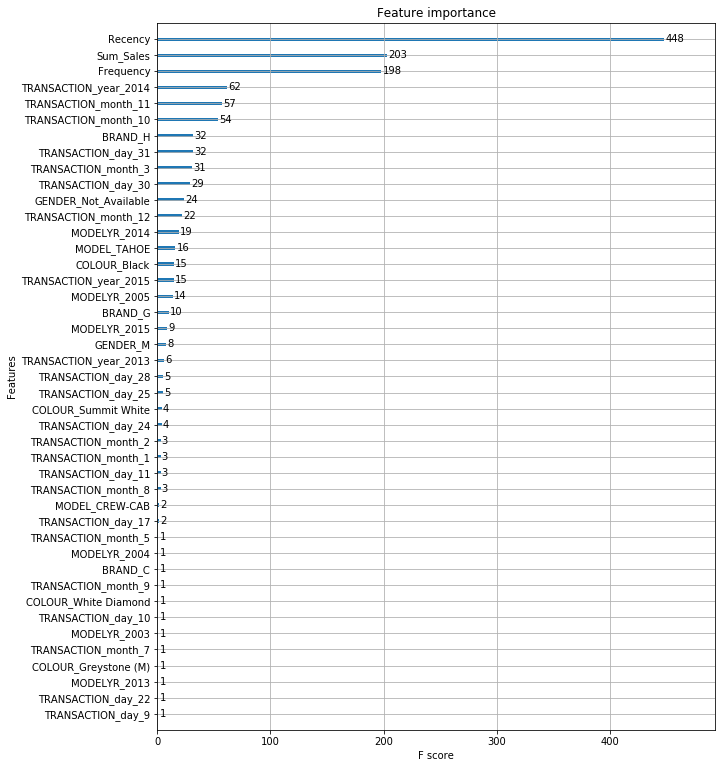

In [75]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,13))
plot_importance(model, ax=ax)

In [76]:
# from xgboost import plot_importance
# plot_importance(model)
# pyplot.show()

In [77]:
model.get_booster().get_score(importance_type="gain")

{'Frequency': 0.39317586892621714,
 'TRANSACTION_month_12': 2.505857615296818,
 'TRANSACTION_day_9': 0.163226962,
 'TRANSACTION_day_22': 1.29920149,
 'Sum_Sales': 1.3974379613300008,
 'TRANSACTION_year_2014': 2.7210139709483876,
 'Recency': 2.3341636091616342,
 'TRANSACTION_day_24': 1.8345205935000002,
 'TRANSACTION_month_10': 1.6225058823350003,
 'GENDER_M': 0.4129246494625,
 'TRANSACTION_day_25': 1.2322066294,
 'TRANSACTION_month_11': 1.4090906213310526,
 'MODELYR_2005': 1.0650419877142858,
 'TRANSACTION_year_2015': 1.2397604522740002,
 'TRANSACTION_month_8': 0.9370937759999999,
 'MODELYR_2013': 3.51366377,
 'TRANSACTION_day_11': 1.8337566063333333,
 'GENDER_Not_Available': 0.3031711494750001,
 'COLOUR_Greystone (M)': 1.43328929,
 'TRANSACTION_month_7': 0.0471167564,
 'MODELYR_2015': 0.15644529666666665,
 'TRANSACTION_day_17': 0.8513420225,
 'MODEL_CREW-CAB': 0.7919073084999999,
 'TRANSACTION_year_2013': 1.7657881781666669,
 'MODELYR_2003': 0.139667511,
 'TRANSACTION_month_1': 0.2797

In [78]:
test_model_data['purchased'].value_counts()

0    4188
1      57
Name: purchased, dtype: int64

In [79]:
y_pred = model.predict(test_model_data[test_model_data.columns.difference(['CUSTOMERID', 'purchased'])])

In [80]:
y_pred_pred = model.predict_proba(test_model_data[test_model_data.columns.difference(['CUSTOMERID', 'purchased'])])

In [81]:
y_pred_pred

array([[7.3129833e-02, 9.2687017e-01],
       [9.9862683e-01, 1.3731655e-03],
       [9.8769844e-01, 1.2301552e-02],
       ...,
       [9.9990934e-01, 9.0657741e-05],
       [9.9977583e-01, 2.2419053e-04],
       [9.9989951e-01, 1.0051003e-04]], dtype=float32)

In [82]:
# from sklearn import metrics
# fpr, tpr, thresholds = metrics.roc_curve(y_pred, test_model_data['purchased'])

In [83]:
# def Find_Optimal_Cutoff(target, predicted):
# #     from sklearn import metrics,roc_curve
#     fpr, tpr, threshold = metrics.roc_curve(target, predicted)
#     i = np.arange(len(tpr)) 
#     roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
#     roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

#     return list(roc_t['threshold']) 

# threshold = Find_Optimal_Cutoff(test_model_data['purchased'],y_pred)
# threshold

In [84]:
accuracy = accuracy_score(y_pred, test_model_data['purchased'])

In [85]:
accuracy

0.9448763250883392

In [86]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [87]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [88]:
cm1 = confusion_matrix(test_model_data['purchased'],y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[4009  179]
 [  55    2]]
Accuracy :  0.9448763250883392
Sensitivity :  0.957258834765998
Specificity :  0.03508771929824561


In [89]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

In [90]:
auc = roc_auc_score(y_pred, test_model_data['purchased'])
print('ROC AUC: %f' % auc)

ROC AUC: 0.498758


In [91]:
precision = precision_score(y_pred, test_model_data['purchased'])
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_pred, test_model_data['purchased'])
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_pred, test_model_data['purchased'])
print('F1 score: %f' % f1)

Precision: 0.035088
Recall: 0.011050
F1 score: 0.016807


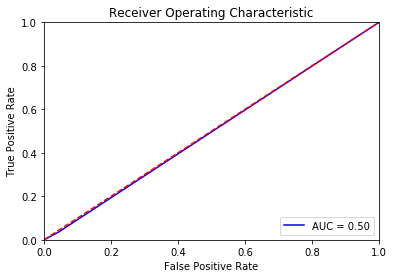

In [92]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve( test_model_data['purchased'], y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# # method II: ggplot
# from ggplot import *
# df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
# ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [93]:
# Create control and test (target) group for the whole audience

In [94]:
y_pred_pred[:, 1]

array([9.2687017e-01, 1.3731655e-03, 1.2301552e-02, ..., 9.0657741e-05,
       2.2419053e-04, 1.0051003e-04], dtype=float32)

In [95]:
test_model_data["probs"] = y_pred_pred[:, 1]
test_model_data.head()

,CUSTOMERID,Recency,Frequency,Sum_Sales,COLOUR_Abalone White,COLOUR_Active Red Metallic,COLOUR_Alchemy Metallic,COLOUR_Alpine White,COLOUR_Alto Grey Metallic,COLOUR_Amazon Dark Blue,COLOUR_Amber Bronze,COLOUR_Antelope,COLOUR_Arctic White,COLOUR_Artic White,COLOUR_Ashen Grey Metallic,COLOUR_Atlantis Blue Metallic,COLOUR_Auburn Brown,COLOUR_Aut Wood / Brz Mist,COLOUR_Azurite Blue,COLOUR_BAROLO RED,COLOUR_BERRY RED,COLOUR_BLACK,COLOUR_BLACK II,COLOUR_BLACK SAPPHIRE,COLOUR_BLUE METALLIC,COLOUR_BRIGHTON GOLD,COLOUR_Bamboo Green,COLOUR_Barbados Blue,COLOUR_Bermuda Dark Blue,COLOUR_Berry Red,COLOUR_Black,COLOUR_Black / Cayene Red M,COLOUR_Black / Polo Green,COLOUR_Black / Quicksilver,COLOUR_Black Granite,COLOUR_Black Ice Metallic,COLOUR_Black Onyx/Gray,COLOUR_Black Raven,COLOUR_Black Saphire Metallic,COLOUR_Black Sapphire,COLOUR_Black/Beige,COLOUR_Black/Pewter,COLOUR_Blue Granite,COLOUR_Blue Granite Metallic,COLOUR_Blue Ice,COLOUR_Blue Ray Metallic,COLOUR_Blue Topaz Metallic,COLOUR_Blue Velvet Metallic,COLOUR_Blue/Sandalwood,COLOUR_Boracay Blue,COLOUR_Botanica Dark Blue,COLOUR_Brgt. Aqua/Polo Grn.,COLOUR_Bright Aqua Metallic,COLOUR_Bright Aqua/Pewter,COLOUR_Bright Green Met.,COLOUR_Bright Red,COLOUR_Bright Silver Met.,COLOUR_Bright White,COLOUR_Bright Yellow,COLOUR_Brit Aqua/Q.silver,COLOUR_Brite Aqua/Lt Autumn,COLOUR_Bronzemist,COLOUR_Brownstone Metallic,COLOUR_Brz Mist / Aut Wood,COLOUR_Burnt Red Metallic,COLOUR_CHILI RED,COLOUR_CINNABAR DARK ORANGE,COLOUR_COBALT BLUE,COLOUR_Canterbury Green,COLOUR_Capricorn Dark Green,COLOUR_Carbon Flash Black,COLOUR_Caribbean Blue,COLOUR_Carm.Red/Automn Wood,COLOUR_Carmine Red,COLOUR_Carmine Red/Pewter,COLOUR_Casablanka White,COLOUR_Cashmere,COLOUR_Cashmere Beige,COLOUR_Cayene Red Metallic,COLOUR_Champagne,COLOUR_Champagne Silver Metallic,COLOUR_Charcoal Grey,COLOUR_Cherry Ice,COLOUR_Cherry Ice/Cay Red M,COLOUR_Cherry Ice/Dk Cherry,COLOUR_Cherry Ice/Lt. Autum,COLOUR_Cherry Ice/Silver,COLOUR_Classic Green,COLOUR_Concord Metallic,COLOUR_Copper/lower Gold,COLOUR_Cosmo Purple,COLOUR_Cotillion White,COLOUR_Cove Green,COLOUR_Crystal Red,COLOUR_Crystal Red Tintcoat,COLOUR_Crystal White,COLOUR_Cyber Gray,COLOUR_D.Bronzemist/Pewter,COLOUR_DARK SAPPHIRE,COLOUR_Dallia Blue,COLOUR_Dark Adriatic Blue,COLOUR_Dark Blue,COLOUR_Dark Burgundy,COLOUR_Dark Cherry,COLOUR_Dark Cherry Red,COLOUR_Dark Cherry/Beige,COLOUR_Dark Chestnut,COLOUR_Dark Copper,COLOUR_Dark Copper/Bronze,COLOUR_Dark Denim Grey,COLOUR_Dark Granite Metallic,COLOUR_Dark Gray,COLOUR_Dark Green Grey,COLOUR_Dark Grey,COLOUR_Dark Tropic Teal Met,COLOUR_Dark Wine Purple,COLOUR_DarkCarmiRed/LtAuWoo,COLOUR_Daydream Beige Metallic,COLOUR_Deep Blue Green,COLOUR_Deep Espresso Brown Metallic,COLOUR_Deep Ocean Blue Metallic,COLOUR_Deep Ruby Metallic,COLOUR_Delft Blue,COLOUR_Denim Blue,COLOUR_Diamond White,COLOUR_Dk A Blue/Cay Red Me,COLOUR_Dk A-Blue/Lt A-Wood,COLOUR_Dk Carmine Red/Gold,COLOUR_Dk Cherry/Cay Red Me,COLOUR_Dk Cherry/Cherry Ice,COLOUR_Dk. Bronze / Silver,COLOUR_Dk. Purple/Automnw.,COLOUR_Dk.Copper/Dk.Argent,COLOUR_Dk.Copper/Lt.Autumnw,COLOUR_Dk.Copper/Pewter,COLOUR_Dk.Green/Lt.Autumnwd,COLOUR_Dk.Otter Met.,COLOUR_Dk.Purple/Silvermist,COLOUR_Dk.Teal Met.,COLOUR_Dove Silver,COLOUR_Dove Silver Metallic,COLOUR_EXPRESSO BLACK,COLOUR_EmeralD Green,COLOUR_Emerald Green,COLOUR_Evoke,COLOUR_Fairway Green,COLOUR_Fire Red,COLOUR_Fire Red / Lt.Pewter,COLOUR_Fire Red/Gold,COLOUR_Forest Green Metallc,COLOUR_Forest Green/Pewter,COLOUR_Frost Beige,COLOUR_Frost Green Metallic,COLOUR_Frost White,COLOUR_GALAXY WHITE,COLOUR_GOLDEN YELLOW,COLOUR_Galaxy White,COLOUR_Garnet Red,COLOUR_Genesis Blue,COLOUR_Genteel Green,COLOUR_Gilt Green,COLOUR_Glacier Lake Blue,COLOUR_Gold Firemist,COLOUR_Gold Mist (M),COLOUR_Gold/Lower Pewter,COLOUR_Goldish Beige Mica,COLOUR_Granada Black,COLOUR_Granada Dark Red,COLOUR_Graphite,COLOUR_Gray/lw Light Pewter,COLOUR_Graystone Metallic,COLOUR_Green Metallic,COLOUR_Green Pearl/Gold,COLOUR_Green Pearl/Gray,COLOUR_Green/lower Gold,COLOUR_Grey S

In [96]:
test_model_data.shape

(4245, 587)

In [97]:
test_model_data['decile'] = pd.qcut(test_model_data['probs'], 10, labels=False)

In [99]:
# test_model_data[['CUSTOMERID','probs', 'decile']].to_excel("score.xlsx")

In [100]:
decile_cut = test_model_data['decile'].value_counts().reset_index()

decile_cut.columns = ['decile', 'Customer_counts']

In [101]:
decile_cut.sort_values(['decile'])

,decile,Customer_counts
1,0,431
8,1,418
2,2,430
6,3,421
0,4,437
7,5,420
9,6,414
3,7,425
4,8,425
5,9,424


In [102]:
#####################################################

In [103]:
data_Anomalies_filters_new_cars.head(2)

,index,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,CUS_BIRTH_DATE,GENDER,TRANSACTION_DATE_1,CUS_BIRTH_DATE_1,profit_gain,selling_price,profit_gain_indicator,TRANSACTION_year,TRANSACTION_month,TRANSACTION_day
2,3,17,492653,2013-08-25,H,CAPRICE,Quick Silver,8793.07650,-0.01069,2004,55,73/12/12 00:00:00,M,2013-08-25,1973-12-12,-94.02540,8699.05110,Negative,2013,8,25
3,4,17,504038,2013-08-20,H,CAPRICE,WHITE,8793.07650,-0.00335,2004,70,88/08/16 00:00:00,F,2013-08-20,1988-08-16,-29.44791,8763.62859,Negative,2013,8,20


In [104]:
from scipy.stats import pointbiserialr
import scipy.stats as stats

import pandas as pd
import scipy.stats as stats
# import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
import matplotlib.pyplot as plt



In [108]:
data_Anomalies_filters_new_cars.rename(columns={'DISCOUNTED RATIO' : 'DISCOUNTED_RATIO'}, inplace = True)

In [110]:
data_Anomalies_filters_new_cars['profit_gain'] = data_Anomalies_filters_new_cars['ACTUAL_PRICE'] * data_Anomalies_filters_new_cars['DISCOUNTED_RATIO']
data_Anomalies_filters_new_cars['selling_price'] = data_Anomalies_filters_new_cars['ACTUAL_PRICE'] + data_Anomalies_filters_new_cars['profit_gain']

In [111]:
results = ols('selling_price ~ C(MODELYR)', data=data_Anomalies_filters_new_cars).fit()
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table


,sum_sq,df,F,PR(>F)
C(MODELYR),32471082110.10450,22.00000,88.30393,0.00000
Residual,118388988540.90242,7083.00000,nan,nan


In [112]:
results = ols('DISCOUNTED_RATIO ~ C(MODEL)', data=data_Anomalies_filters_new_cars).fit()
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table


,sum_sq,df,F,PR(>F)
C(MODEL),0.10264,65.00000,24.17021,0.00000
Residual,0.45992,7040.00000,nan,nan


In [105]:
results = ols('ACTUAL_PRICE ~ C(MODELYR)', data=data_Anomalies_filters_new_cars).fit()
# X = sm.add_constant(X)
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table


,sum_sq,df,F,PR(>F)
C(MODELYR),32318529229.88818,22.00000,88.96214,0.00000
Residual,116960962410.52458,7083.00000,nan,nan


In [106]:
results = ols('ACTUAL_PRICE ~ C(MODEL)', data=data_Anomalies_filters_new_cars).fit()
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table


,sum_sq,df,F,PR(>F)
C(MODEL),107552227576.92503,65.00000,279.16361,0.00000
Residual,41727264063.48351,7040.00000,nan,nan


In [107]:
results = ols('ACTUAL_PRICE ~ C(GENDER)', data=data_Anomalies_filters_new_cars).fit()
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(GENDER),8428070.92896,2.00000,0.19943,0.81920
Residual,147255935199.06589,6969.00000,nan,nan


In [113]:
# TUKEY’S HSD POST-HOC COMPARISON
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data_Anomalies_filters_new_cars['ACTUAL_PRICE'], data_Anomalies_filters_new_cars['MODEL'])
mc_results = mc.tukeyhsd()
print(mc_results)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
   group1       group2      meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------------------
         9-3          9-5   2430.8604    0.9  -5613.1603  10474.8811  False
         9-3        ASTRA  -5962.7561  0.001 -10398.6056  -1526.9067   True
         9-3          ATS   4390.7396 0.4394   -971.9408     9753.42  False
         9-3    AVALANCHE   5112.4312 0.0295    168.2841  10056.5783   True
         9-3         AVEO  -7196.1113  0.001 -11152.5332  -3239.6893   True
         9-3       BLAZER  -1616.2968    0.9  -5436.1818   2203.5882  False
         9-3          BUS   14302.412  0.001   9246.4284  19358.3957   True
         9-3       CAMARO   4838.6559 0.0011    850.6446   8826.6672   True
         9-3      CAPRICE  -1047.8877    0.9  -4849.7375   2753.9622  False
         9-3    CAPRICE-X     -650.57    0.9  -4489.0055   3187.8655  False
         9-3

In [ ]:
# pbc = pointbiserialr(data_Anomalies_filters_new_cars['MODEL'], data_Anomalies_filters_new_cars['ACTUAL_PRICE'])
# print(pbc)

In [ ]:
# j.	Create control and test (target) group for the whole audience




In [ ]:
####################################################################################

In [114]:
from sklearn.ensemble import RandomForestRegressor


In [115]:
regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [117]:

y_pred = regressor.predict(test_model_data[test_model_data.columns.difference(['CUSTOMERID', 'purchased'])])

In [ ]:
# list(y_pred)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
cm1 = confusion_matrix(test_model_data['purchased'],y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

In [ ]:
auc = roc_auc_score(y_pred, test_model_data['purchased'])
print('ROC AUC: %f' % auc)

In [ ]:
precision = precision_score(y_pred, test_model_data['purchased'])
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_pred, test_model_data['purchased'])
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_pred, test_model_data['purchased'])
print('F1 score: %f' % f1)